# **Imports**

In [24]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import re

# **Load and Preprocess the Dataset**

In [25]:
data = "https://raw.githubusercontent.com/psyche-mental-health/Psyche-MachineLearning/refs/heads/main/Dataset/raw_data.csv"

In [26]:
df_data = pd.read_csv(data, delimiter= ",")

In [27]:
df_data

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [29]:
print('DataFrame Mental Health Detection')
df_data.isnull().sum()

DataFrame Mental Health Detection


,0
Number,0
Sleep,273
Appetite,273
Interest,273
Fatigue,273
Worthlessness,273
Concentration,273
Agitation,273
Suicidal Ideation,273
Sleep Disturbance,273


# **Data Cleaning**

In [30]:
df_data = df_data.apply(lambda col: col.fillna(col.mode()[0]), axis=0)
column_modes = df_data.mode().iloc[0]
rows_to_add = 1000 - len(df_data)

if rows_to_add > 0:
    new_rows = pd.DataFrame([column_modes] * rows_to_add, columns=df_data.columns)
    # Append the new rows to the dataset
    filled_dataset = pd.concat([df_data, new_rows], ignore_index=True)

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              813 non-null    float64
 2   Appetite           813 non-null    float64
 3   Interest           813 non-null    float64
 4   Fatigue            813 non-null    float64
 5   Worthlessness      813 non-null    float64
 6   Concentration      813 non-null    float64
 7   Agitation          813 non-null    float64
 8   Suicidal Ideation  813 non-null    float64
 9   Sleep Disturbance  813 non-null    float64
 10  Aggression         813 non-null    float64
 11  Panic Attacks      813 non-null    float64
 12  Hopelessness       813 non-null    float64
 13  Restlessness       813 non-null    float64
 14  Low Energy         813 non-null    float64
 15  Depression State   813 non-null    object 
dtypes: float64(14), int64(1), 

In [32]:
print('DataFrame Mental Health Detection')
df_data.isnull().sum()

DataFrame Mental Health Detection


,0
Number,0
Sleep,0
Appetite,0
Interest,0
Fatigue,0
Worthlessness,0
Concentration,0
Agitation,0
Suicidal Ideation,0
Sleep Disturbance,0


In [33]:
df_data['Depression State'] = df_data['Depression State'].astype(str)

In [34]:
df_data['Depression State'] = df_data['Depression State'].apply(lambda x: re.sub(r'\t', '', x))
df_data['Depression State'] = df_data['Depression State'].apply(lambda x: re.sub(r'^\d+', '', x))
print(df_data['Depression State'].unique())

['Mild' 'Moderate' 'Severe' 'No depression']


In [35]:
df_data.loc[df_data['Depression State'] == 'No depression', 'Depression State'] = 0.0
df_data.loc[df_data['Depression State'] == 'No Depression', 'Depression State'] = 0.0
df_data.loc[df_data['Depression State'] == 'Mild', 'Depression State'] = 1.0
df_data.loc[df_data['Depression State'] == 'Moderate', 'Depression State'] = 2.0
df_data.loc[df_data['Depression State'] == 'Severe', 'Depression State'] = 3.0
df_data

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,809,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
809,810,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
810,811,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
811,812,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0


In [36]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              813 non-null    float64
 2   Appetite           813 non-null    float64
 3   Interest           813 non-null    float64
 4   Fatigue            813 non-null    float64
 5   Worthlessness      813 non-null    float64
 6   Concentration      813 non-null    float64
 7   Agitation          813 non-null    float64
 8   Suicidal Ideation  813 non-null    float64
 9   Sleep Disturbance  813 non-null    float64
 10  Aggression         813 non-null    float64
 11  Panic Attacks      813 non-null    float64
 12  Hopelessness       813 non-null    float64
 13  Restlessness       813 non-null    float64
 14  Low Energy         813 non-null    float64
 15  Depression State   813 non-null    object 
dtypes: float64(14), int64(1), 

In [37]:
print(df_data.columns)

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')


In [38]:
df_data['Depression State'] = df_data['Depression State'].astype(float)

print(df_data)
print(df_data.dtypes)

     Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  \
0          1    1.0       1.0       1.0      5.0            5.0   
1          2    2.0       5.0       5.0      1.0            1.0   
2          3    5.0       2.0       2.0      2.0            2.0   
3          4    1.0       1.0       1.0      5.0            5.0   
4          5    2.0       5.0       5.0      1.0            1.0   
..       ...    ...       ...       ...      ...            ...   
808      809    5.0       5.0       5.0      5.0            5.0   
809      810    5.0       5.0       5.0      5.0            5.0   
810      811    5.0       5.0       5.0      5.0            5.0   
811      812    5.0       5.0       5.0      5.0            5.0   
812      813    5.0       5.0       5.0      5.0            5.0   

     Concentration  Agitation  Suicidal Ideation  Sleep Disturbance  \
0              1.0        5.0                5.0                1.0   
1              5.0        1.0                1.0     

In [39]:
df_data = df_data.drop(columns=['Number '])
print(df_data.columns)

Index(['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')


In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sleep              813 non-null    float64
 1   Appetite           813 non-null    float64
 2   Interest           813 non-null    float64
 3   Fatigue            813 non-null    float64
 4   Worthlessness      813 non-null    float64
 5   Concentration      813 non-null    float64
 6   Agitation          813 non-null    float64
 7   Suicidal Ideation  813 non-null    float64
 8   Sleep Disturbance  813 non-null    float64
 9   Aggression         813 non-null    float64
 10  Panic Attacks      813 non-null    float64
 11  Hopelessness       813 non-null    float64
 12  Restlessness       813 non-null    float64
 13  Low Energy         813 non-null    float64
 14  Depression State   813 non-null    float64
dtypes: float64(15)
memory usage: 95.4 KB


# **Normalize Data & Feature Eng.**

In [41]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Sleep",	"Appetite",	"Interest", "Fatigue", "Worthlessness",
                      "Concentration",	"Agitation",	"Suicidal Ideation",
                      "Sleep Disturbance",	"Aggression",	"Panic Attacks",	"Hopelessness",
                      "Restlessness",	"Low Energy"])
)

In [42]:
df_data

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0
1,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0
2,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
3,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,0.0
4,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
809,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
810,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
811,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0


In [43]:
df_data.describe()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,3.613776,3.523985,3.528905,3.648216,3.643296,3.523985,3.650677,3.648216,3.541205,3.658057,3.662977,3.648216,3.648216,3.621156,0.888069
std,1.725899,1.722347,1.723701,1.704597,1.715101,1.720917,1.698591,1.708927,1.701879,1.696468,1.685806,1.701705,1.708927,1.715374,1.125617
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000
max,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000


# **Corr**

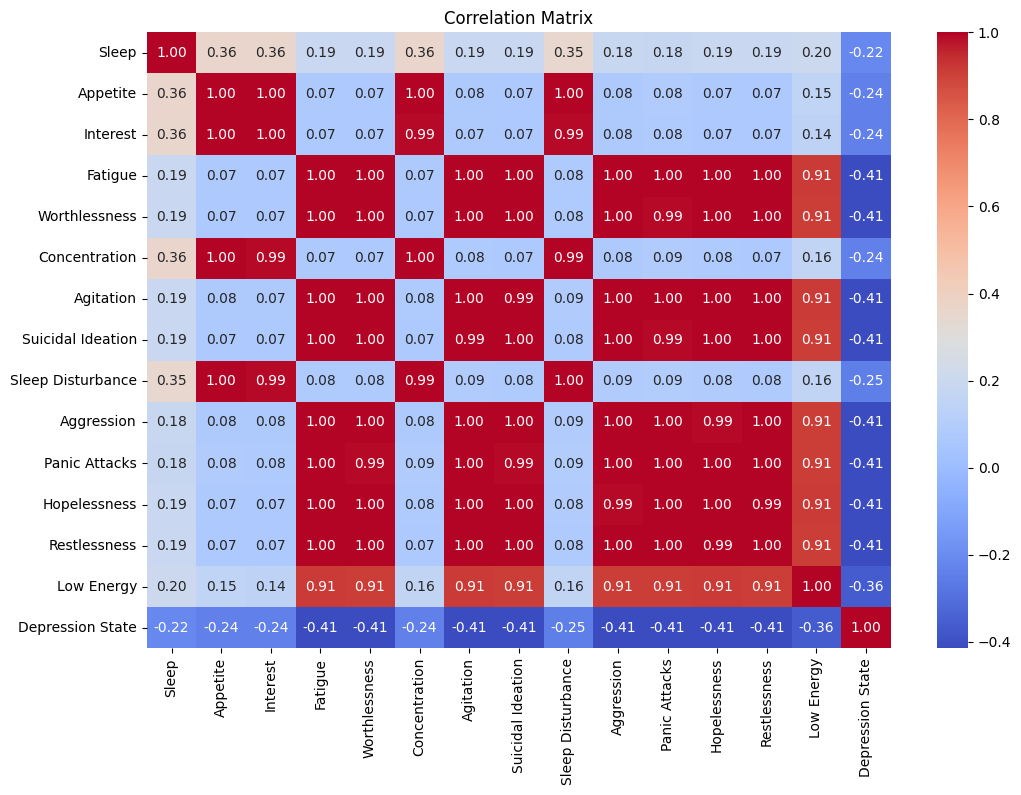

In [44]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Download Data**

In [45]:
data_fix = pd.DataFrame(df_data)

data_fix.to_csv('clean_data.csv', index=False)
print("Dataset berhasil disimpan sebagai CSV.")

Dataset berhasil disimpan sebagai CSV.


In [46]:
from google.colab import files
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>